# Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import tree
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn import neural_network
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

# Read Data, Split into Test/Train sets

In [2]:
letter_data = pd.read_csv("https://raw.githubusercontent.com/charlieaxle/cs7461_1/master/letters_data.csv",
                         names = ["class","x1",'x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16'],
                         index_col=False)

In [4]:
y= letter_data['class']
X = letter_data.drop('class',axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# Decision Tree

In [9]:
train_scores, valid_scores = validation_curve(estimator=tree.DecisionTreeClassifier(),X=X_train, y=y_train, param_name="max_depth", param_range=range(1,50), cv=5)

In [10]:
train_scores_avg = train_scores.mean(axis=1)
valid_scores_avg = valid_scores.mean(axis=1)

(0.0, 1)

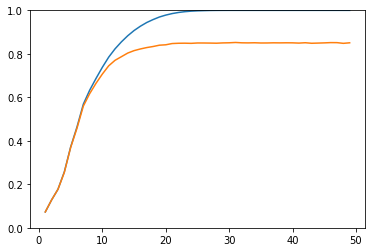

In [12]:
plt.plot(range(1,50),train_scores_avg, label="Training Accuracy")
plt.plot(range(1,50),valid_scores_avg, Label ="Cross Validation Accuracy")
plt.ylim(.0,1)

In [8]:
GStree = GridSearchCV(estimator=tree.DecisionTreeClassifier(),cv=5, param_grid={"max_depth":range(1,50)})

In [11]:
t0 = time.time()
GStree.fit(X_train, y_train)
print (time.time()-t0)

14.986768960952759


In [19]:
GStree.best_params_

{'max_depth': 48}

In [55]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(tree.DecisionTreeClassifier(max_depth=10),X_train, y_train,train_sizes= np.linspace(.1,1,20), cv=5, shuffle=True)

In [56]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

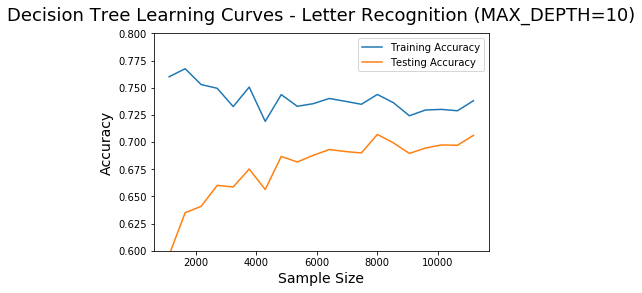

In [64]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('Decision Tree Learning Curves - Letter Recognition (MAX_DEPTH=10)', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.6,.8)

plt.savefig("Letters_DT_LC-2.png",bbox_inches="tight")

# K-Nearest Neighbors

In [9]:
train_scores, valid_scores = validation_curve(estimator=neighbors.KNeighborsClassifier(),X=X_train, y=y_train, param_name="n_neighbors", param_range=range(1,10,1), cv=5)

In [85]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

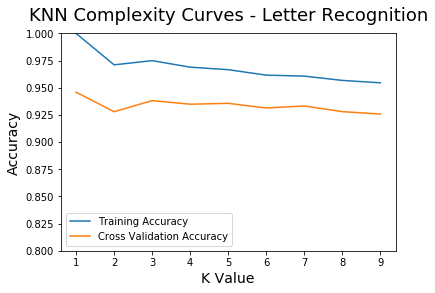

In [95]:
plt.plot(range(1,10,1),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,10,1),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('K Value', fontsize = 14)
plt.title('KNN Complexity Curves - Letter Recognition', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.8,1)

plt.savefig("Letters_KNN_LC.png",bbox_inches="tight")

In [13]:
GSknn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(), cv=5, param_grid ={'n_neighbors':range(1,10)})

In [14]:
t0 = time.time()
GSknn.fit(X=X_train, y=y_train)
print (time.time()-t0)

59.17919731140137


In [15]:
GSknn.best_params_

{'n_neighbors': 1}

In [92]:
y_pred=GSknn.predict(X_test)

In [103]:
y_pred[0:10]

array(['V', 'O', 'A', 'Q', 'M', 'D', 'K', 'D', 'Q', 'I'], dtype=object)

In [104]:
y_test[0:10]

17551    V
18808    O
17171    A
5640     Q
10378    M
18254    D
3302     K
16946    D
19118    Q
16136    I
Name: class, dtype: object

In [15]:
accuracy_score(y_pred,y_test)

In [26]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(neighbors.KNeighborsClassifier(n_neighbors=10),X_train, y_train,train_sizes= np.linspace(.1,1,10),cv=5)

In [20]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

In [21]:
learn_train_mean

array([ 0.75120643,  0.83538874,  0.87602026,  0.90223414,  0.91679771,
        0.92679077,  0.93612459,  0.9420306 ,  0.94646545,  0.94992852])

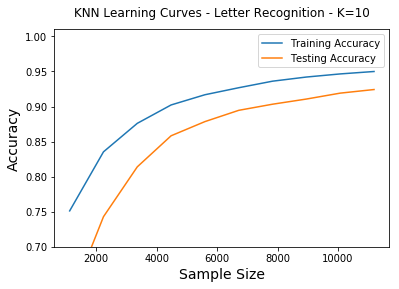

In [23]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('KNN Learning Curves - Letter Recognition - K=10', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.70,1.01)
plt.savefig("Letters_KNN_LC_k10.png")

# Artificial Neural Networks

In [18]:
train_scores, valid_scores = validation_curve(estimator=MLPClassifier(max_iter=2000),X=X_train, y=y_train, param_name="hidden_layer_sizes", param_range=[(i,) for i in range(1,20)], cv=5)

TypeError: validation_curve() got an unexpected keyword argument 'shuffle'

In [14]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

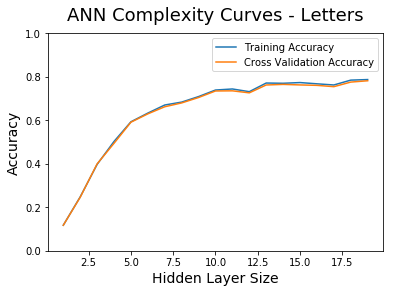

In [17]:
plt.plot(range(1,20),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,20),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Hidden Layer Size', fontsize = 14)
plt.title('ANN Complexity Curves - Letters', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1)

plt.savefig("Letters_ANN_VC1.png",bbox_inches="tight")

In [17]:
GSann = GridSearchCV(estimator=MLPClassifier(max_iter=2000), cv=5, param_grid ={'hidden_layer_sizes':[(i,) for i in range(1,20)],'activation' : 
                                                                                ('identity','logistic', 'tanh', 'relu'),'learning_rate' : ('constant', 'invscaling', 'adaptive')})

In [19]:
RSann = RandomizedSearchCV(estimator=MLPClassifier(max_iter=2000), cv=5, param_distributions ={'hidden_layer_sizes':[(i,) for i in range(1,20)],'activation' : 
                                                                                ('identity','logistic', 'tanh', 'relu'),'learning_rate' : ('constant', 'invscaling', 'adaptive')})

In [20]:
t0 = time.time()
RSann.fit(X_train,y_train)
print (time.time()-t0)

206.4957628250122


In [18]:
RSann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (19,),
 'learning_rate': 'constant'}

In [20]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(RSann,X_train, y_train,train_sizes= np.linspace(.1,1,5))

In [21]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

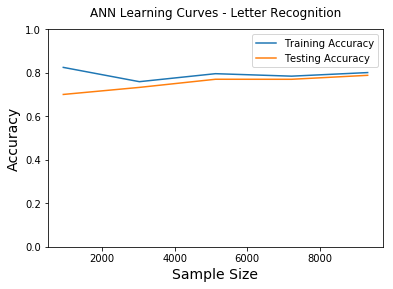

In [22]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('ANN Learning Curves - Letter Recognition', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)
plt.savefig("Letters_ANN_LC.png")

In [23]:
y_pred=RSann.predict(X_test)

In [24]:
accuracy_score(y_pred,y_test)

0.79533333333333334

# Boosting

In [15]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=5
                                                                                        )),X=X_train,y=y_train, param_name='n_estimators',
                                             param_range=range(1,100),cv=3)

In [16]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

In [37]:
train_scores_mean

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.])

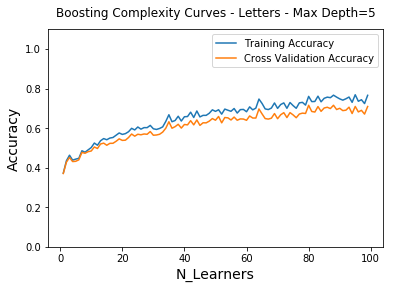

In [18]:
plt.plot(range(1,100),train_scores_mean, label="Training Accuracy")
plt.plot(range(1,100),valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('N_Learners', fontsize = 14)
plt.title('Boosting Complexity Curves - Letters - Max Depth=5', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)

plt.savefig("Letters_BOOST_VC_md5_2.png",bbox_inches="tight")

In [22]:
GSboost = GridSearchCV(estimator=AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=44
                                                                                        )), cv=5, param_grid ={'n_estimators':range(1,20)})

In [23]:
t0 = time.time()
GSboost.fit(X_train,y_train)
print (time.time()-t0)

8.304119348526001


In [24]:
GSboost.best_params_

{'n_estimators': 15}

In [27]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(GSboost,X_train, y_train,train_sizes= np.linspace(.1,1,10),cv=5)

In [28]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

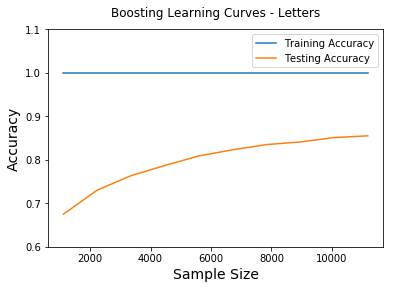

In [32]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('Boosting Learning Curves - Letters', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.6,1.1)
plt.savefig("Letters_BOOST_LC_1.png")

In [33]:
y_pred=GSboost.predict(X_test)

In [36]:
accuracy_score(y_pred,y_test)

0.87250000000000005

In [24]:
import sklearn.svm
from sklearn.svm import SVC

# SVM

In [44]:
train_scores, valid_scores = validation_curve(SVC(),X=X_train, y=y_train, param_name="gamma", param_range=[.01,.03,.05,.1,.15,.2], cv=5)

In [45]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

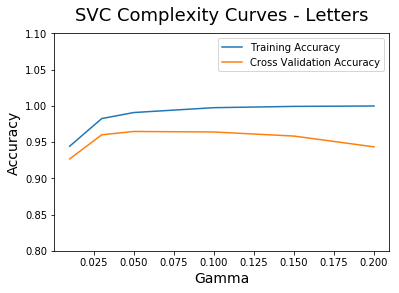

In [46]:
plt.plot([.01,.03,.05,.1,.15,.2],train_scores_mean, label="Training Accuracy")
plt.plot([.01,.03,.05,.1,.15,.2],valid_scores_mean, label ="Cross Validation Accuracy")
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Gamma', fontsize = 14)
plt.title('SVC Complexity Curves - Letters', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.8,1.1)

plt.savefig("Letters_SVC_VC1.png",bbox_inches="tight")

In [25]:
GSsvc = GridSearchCV(estimator=SVC(), cv=5, param_grid ={'gamma':[.01,.03,.05,.1,.15,.2],'kernel':['rbf','poly','sigmoid','linear']})

In [26]:
import time
t0 = time.time()
GSsvc.fit(X_train, y_train)
print (time.time()-t0)

1180.9760661125183


In [12]:
GSsvc.best_params_

{'gamma': 0.05, 'kernel': 'rbf'}

In [13]:
y_pred=GSsvc.predict(X_test)

In [16]:
accuracy_score(y_pred,y_test)

0.97050000000000003

In [29]:
train_sizes, learn_train_scores, learn_test_scores = learning_curve(GSsvc,X_train, y_train,train_sizes= np.linspace(.1,1,5),cv=3)

In [30]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

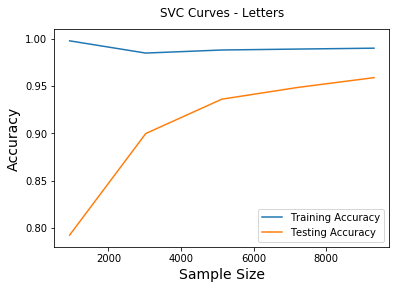

In [33]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('SVC Curves - Letters', fontsize = 12, y = 1.03)
plt.legend()
plt.ylim(0.78,1.01)
plt.savefig("Letters_SVC_LC_1.png")